In [2]:
import torch
import torch.autograd as autograd         # computation graph
from torch import Tensor                  # tensor node in the computation graph
import torch.nn as nn                     # neural networks
import torch.optim as optim               # optimizers e.g. gradient descent, ADAM, etc.

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker
from torch.nn.parameter import Parameter

import numpy as np
import time
from pyDOE import lhs         #Latin Hypercube Sampling
import scipy.io

from smt.sampling_methods import LHS
from scipy.io import savemat

#Set default dtype to float32
torch.set_default_dtype(torch.float)

#PyTorch random number generator
torch.manual_seed(1234)

# Random number generators in other libraries
np.random.seed(1234)

device = torch.device('cpu')

print(device)

if device == 'cuda': 
    print(torch.cuda.get_device_name())

cpu


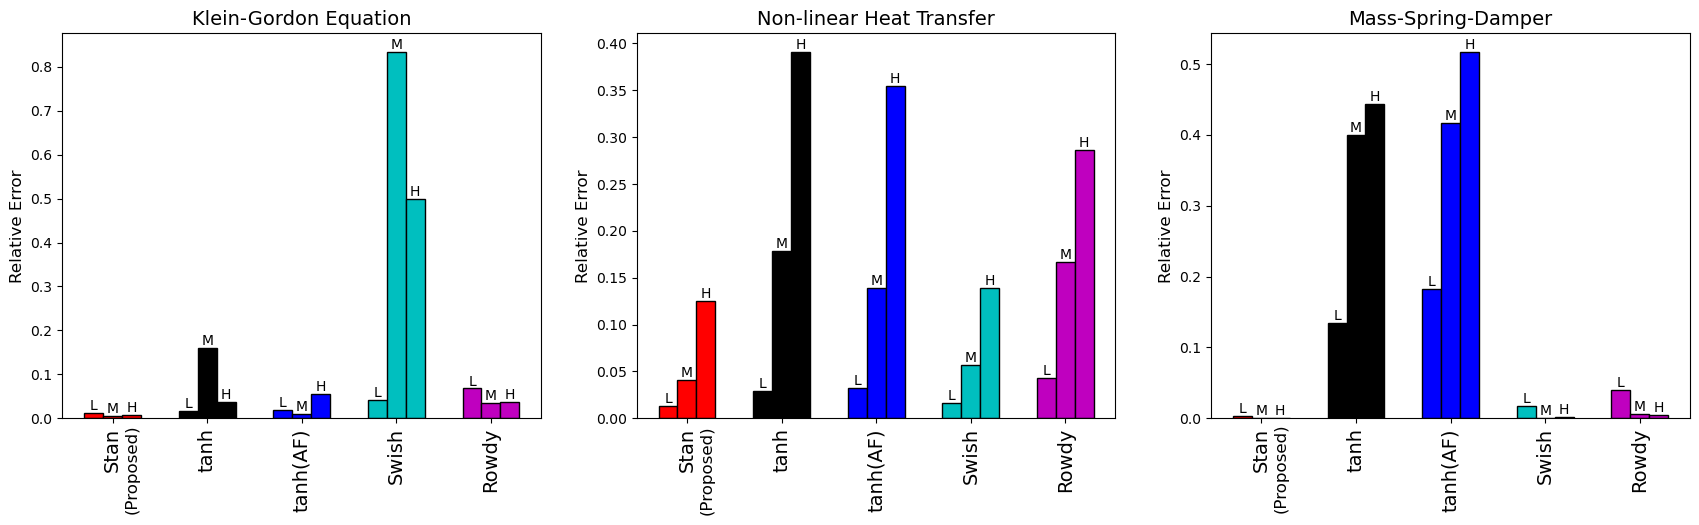

In [4]:
folder_base = './2D/Klein Gordon/'

fig, axs = plt.subplots(1,3)
ax = axs[0]

num_steps = 300
prob_name = "KG_"

levels = ["_low","_medium","_high"]
all_labels = ['Stan','tanh','tanh(AF)','Swish','Rowdy']
all_colors = ['r','k','b','c','m']

folders = ['stan/','tanh/','atanh/','swish/','rowdy/']
algo_names = ['stan','tanh','atanh','swish','rowdy']

stop = -5

tick_locs = np.zeros((5,))
for i in range(5):
    mean_test_loss = np.zeros((3,))
    
    for j in range(3):
        level = levels[j]
        
        dat = scipy.io.loadmat(folder_base + folders[i]+prob_name+algo_names[i]+level+'.mat')
        test_loss =  dat['test_re_loss']
        
        mean_test_loss[j] = np.nanmean(test_loss[:,-1],axis = 0)
    
    
    start = stop + 3
    stop = start + 2
    locs = np.linspace(start,stop,3)
    
    tick_locs[i] = start+1
    bar = ax.bar(locs,mean_test_loss,width = 1.0,color = all_colors[i],edgecolor = "black")
    ax.bar_label(bar,labels = ['L','M','H'],fontsize=10)
ax.set_xticks(tick_locs)
ax.set_xticklabels(all_labels,rotation = 90,fontsize = 14)
# # ax.set_ylim([0,1.1])
# ax.set_yscale('log')
ax.text(tick_locs[0]+0.65,-0.21,'(Proposed)',rotation = 90,fontsize = 12)
ax.set_title('Klein-Gordon Equation', fontsize=14)
ax.set_ylabel('Relative Error',fontsize=12,alpha = 1)
# ax.set_aspect(10)
ax.figure.set_size_inches(21, 5)

#----------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------

folder_base = './3D/HTTP/'

ax = axs[1]

num_steps = 500
prob_name = "3D_HTTP_"

levels = ["_low","_medium","_high"]
all_labels = ['Stan','tanh','tanh(AF)','Swish','Rowdy']
all_colors = ['r','k','b','c','m']

folders = ['stan/','tanh/','atanh/','swish/','rowdy/']
algo_names = ['stan','tanh','atanh','swish','rowdy']

stop = -5

tick_locs = np.zeros((5,))
for i in range(5):
    mean_test_loss = np.zeros((3,))
    
    for j in range(3):
        level = levels[j]
        
        dat = scipy.io.loadmat(folder_base + folders[i]+prob_name+algo_names[i]+level+'.mat')
        test_loss =  dat['test_re_loss']
        
        mean_test_loss[j] = np.nanmean(test_loss[:,-1],axis = 0)
    
    
    start = stop + 3
    stop = start + 2
    locs = np.linspace(start,stop,3)
    
    tick_locs[i] = start+1
    bar = ax.bar(locs,mean_test_loss,width = 1.0,color = all_colors[i],edgecolor = "black")
    ax.bar_label(bar,labels = ['L','M','H'],fontsize=10)
ax.set_xticks(tick_locs)
ax.set_xticklabels(all_labels,rotation = 90,fontsize = 14)
# ax.set_ylim([0,0.8])
# ax.set_yscale('log')
ax.text(tick_locs[0]+0.65,-0.10,'(Proposed)',rotation = 90,fontsize = 12)
ax.set_title('Non-linear Heat Transfer', fontsize=14)
ax.set_ylabel('Relative Error',fontsize=12,alpha = 1)
# ax.set_aspect(10)
ax.figure.set_size_inches(21, 5)
# fig.savefig('Numerical_re_bars.eps', format='eps', bbox_inches='tight')
# fig.savefig('Numerical_re_bars.pdf', format='pdf', bbox_inches='tight')

#---------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------

folder_base = './Inverse/Spring Mass/'

ax = axs[2]

num_steps = 200
prob_name = "1D_SMD_"

levels = ["_low","_medium","_high"]
all_labels = ['Stan','tanh','tanh(AF)','Swish','Rowdy']
all_colors = ['r','k','b','c','m']

folders = ['stan/','tanh/','atanh/','swish/','rowdy/']
algo_names = ['stan','tanh','atanh','swish','rowdy']

stop = -5

tick_locs = np.zeros((5,))
for i in range(5):
    mean_test_loss = np.zeros((3,))
    
    for j in range(3):
        level = levels[j]
        
        dat = scipy.io.loadmat(folder_base + folders[i]+prob_name+algo_names[i]+level+'.mat')
        test_loss =  dat['test_re_loss']
        
        mean_test_loss[j] = np.nanmean(test_loss[:,-1],axis = 0)
    
    
    start = stop + 3
    stop = start + 2
    locs = np.linspace(start,stop,3)
    
    tick_locs[i] = start+1
    bar = ax.bar(locs,mean_test_loss,width = 1.0,color = all_colors[i],edgecolor = "black")
    ax.bar_label(bar,labels = ['L','M','H'],fontsize=10)
ax.set_xticks(tick_locs)
ax.set_xticklabels(all_labels,rotation = 90,fontsize = 14)
# ax.set_ylim([0,0.8])
# ax.set_yscale('log')
ax.text(tick_locs[0]+0.65,-0.13,'(Proposed)',rotation = 90,fontsize = 12)
ax.set_title('Mass-Spring-Damper', fontsize=14)
ax.set_ylabel('Relative Error',fontsize=12,alpha = 1)
# ax.set_aspect(10)
ax.figure.set_size_inches(21, 5)

fig.savefig('Case_re_bars.png', format='png', bbox_inches='tight')
fig.savefig('Case_re_bars.eps', format='eps', bbox_inches='tight')
fig.savefig('Case_re_bars.pdf', format='pdf', bbox_inches='tight')

In [16]:
folder_base = './2D/Klein Gordon/'

num_steps = 300
prob_name = "KG_"

levels = ["_low","_medium","_high"]
all_labels = ['Stan','tanh','N-LAAF','Swish','Rowdy']
all_colors = ['r','k','b','c','m']

folders = ['stan/','tanh/','atanh/','swish/','rowdy/']
algo_names = ['stan','tanh','atanh','swish','rowdy']

stop = -5


for i in range(5):
    mean_test_re_loss = np.zeros((3,))
    mean_test_mse_loss = np.zeros((3,))
    
    for j in range(3):
        level = levels[j]
        
        dat = scipy.io.loadmat(folder_base + folders[i]+prob_name+algo_names[i]+level+'.mat')
        test_re_loss =  dat['test_re_loss']
        test_mse_loss =  dat['test_mse_loss']
        
        mean_test_re_loss[j] = np.nanmean(test_re_loss[:,-1],axis = 0)
        mean_test_mse_loss[j] = np.nanmean(test_mse_loss[:,-1],axis = 0)
    
    
    start = stop + 3
    stop = start + 2
    print(prob_name + all_labels[i],'MSE',mean_test_mse_loss)
    print(prob_name + all_labels[i],'RE',mean_test_re_loss)
    print("\n")

KG_Stan MSE [3.68778160e-05 5.82822876e-05 1.87805727e-04]
KG_Stan RE [0.01314118 0.00538286 0.00793259]


KG_tanh MSE [1.09589548e-04 4.35887927e-01 6.50045585e-03]
KG_tanh RE [0.01769988 0.15938184 0.0371114 ]


KG_N-LAAF MSE [9.22243011e-05 2.55867560e-04 1.39769562e-02]
KG_N-LAAF RE [0.01945364 0.01083494 0.0558148 ]


KG_Swish MSE [4.41358717e-04 3.40840393e+00 1.13010695e+00]
KG_Swish RE [0.0416746  0.83434412 0.4979985 ]


KG_Rowdy MSE [0.00120384 0.00293139 0.00334598]
KG_Rowdy RE [0.067873   0.03559991 0.0369124 ]




In [13]:
folder_base = './3D/HTTP/'

num_steps = 500
prob_name = "3D_HTTP_"

levels = ["_low","_medium","_high"]
all_labels = ['Stan','tanh','N-LAAF','Swish','Rowdy']
all_colors = ['r','k','b','c','m']

folders = ['stan/','tanh/','atanh/','swish/','rowdy/']
algo_names = ['stan','tanh','atanh','swish','rowdy']

stop = -5


for i in range(5):
    mean_test_re_loss = np.zeros((3,))
    mean_test_mse_loss = np.zeros((3,))
    
    for j in range(3):
        level = levels[j]
        
        dat = scipy.io.loadmat(folder_base + folders[i]+prob_name+algo_names[i]+level+'.mat')
        test_re_loss =  dat['test_re_loss']
        test_mse_loss =  dat['test_mse_loss']
        
        mean_test_re_loss[j] = np.nanmean(test_re_loss[:,-1],axis = 0)
        mean_test_mse_loss[j] = np.nanmean(test_mse_loss[:,-1],axis = 0)
    
    
    start = stop + 3
    stop = start + 2
    print(prob_name + all_labels[i],'MSE',mean_test_mse_loss)
    print(prob_name + all_labels[i],'RE',mean_test_re_loss)
    print("\n")

3D_HTTP_Stan MSE [   24.54600868   540.2140131  10863.53187644]
3D_HTTP_Stan RE [0.01290571 0.04108551 0.12488011]


3D_HTTP_tanh MSE [   151.97450894  10195.67208453 114471.05155634]
3D_HTTP_tanh RE [0.02865723 0.17831265 0.39129083]


3D_HTTP_N-LAAF MSE [  258.66810242  8279.83006037 96841.01177099]
3D_HTTP_N-LAAF RE [0.03194835 0.13863111 0.354928  ]


3D_HTTP_Swish MSE [   41.44322244  1122.39217365 13578.9548844 ]
3D_HTTP_Swish RE [0.0163802  0.0566684  0.13933646]


3D_HTTP_Rowdy MSE [  331.42143859 10547.34657037 61091.77828789]
3D_HTTP_Rowdy RE [0.04276769 0.1667639  0.2865462 ]




In [15]:
folder_base = './Inverse/Spring Mass/'

num_steps = 200
prob_name = "1D_SMD_"

levels = ["_low","_medium","_high"]
all_labels = ['Stan','tanh','N-LAAF','Swish','Rowdy']
all_colors = ['r','k','b','c','m']

folders = ['stan/','tanh/','atanh/','swish/','rowdy/']
algo_names = ['stan','tanh','atanh','swish','rowdy']

stop = -5


for i in range(5):
    mean_test_re_loss = np.zeros((3,))
    mean_test_mse_loss = np.zeros((3,))
    
    for j in range(3):
        level = levels[j]
        
        dat = scipy.io.loadmat(folder_base + folders[i]+prob_name+algo_names[i]+level+'.mat')
        test_re_loss =  dat['test_re_loss']
        test_mse_loss =  dat['test_mse_loss']
        
        mean_test_re_loss[j] = np.nanmean(test_re_loss[:,-1],axis = 0)
        mean_test_mse_loss[j] = np.nanmean(test_mse_loss[:,-1],axis = 0)
    
    
    start = stop + 3
    stop = start + 2
    print(prob_name + all_labels[i],'MSE',mean_test_mse_loss)
    print(prob_name + all_labels[i],'RE',mean_test_re_loss)
    print("\n")

1D_SMD_Stan MSE [0.1889627  0.00405151 0.01035463]
1D_SMD_Stan RE [2.86774064e-03 3.22035356e-05 3.35543727e-05]


1D_SMD_tanh MSE [2.45304537e+02 3.66400685e+05 1.53447266e+06]
1D_SMD_tanh RE [0.13456858 0.40021827 0.44334902]


1D_SMD_N-LAAF MSE [3.51695134e+02 3.86408394e+05 1.84724353e+06]
1D_SMD_N-LAAF RE [0.18268328 0.417274   0.51757884]


1D_SMD_Swish MSE [1.91422447e+01 9.39695946e-02 1.58607938e+02]
1D_SMD_Swish RE [0.01687032 0.00016917 0.00223098]


1D_SMD_Rowdy MSE [ 25.97118712 137.54795511 308.05989607]
1D_SMD_Rowdy RE [0.03955793 0.00642551 0.00468703]


